In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output


CSI_Header = ['Date', 'Source', 'Source-ID', 'Open', 'High', 'Low', 'AdjustedClose', 'Close', 'Volume', 'Contract']
date_col = "Date"
value_col = "Close"
ret_col = "LRN"
file_path = "./data/CSI_ES_1.csv"

In [55]:
# load csv into a dataframe
df = pd.read_csv(file_path, names=CSI_Header)
# Ensure the date column is in datetime format
df[date_col] = pd.to_datetime(df[date_col])

df.set_index(date_col, inplace=True)

In [56]:
# Calculate additional columns of interest
df["SMA"] = df[value_col].rolling(window=30).mean()
df["EWMA"] = df[value_col].ewm(span=30, adjust=False).mean()
df["SRN"] = df[value_col].pct_change()
df["LRN"] = np.log(df[value_col] / df[value_col].shift(1))
df['cum_SRN'] = df["SRN"].cumsum()
df['cum_LRN'] = df["LRN"].cumsum()

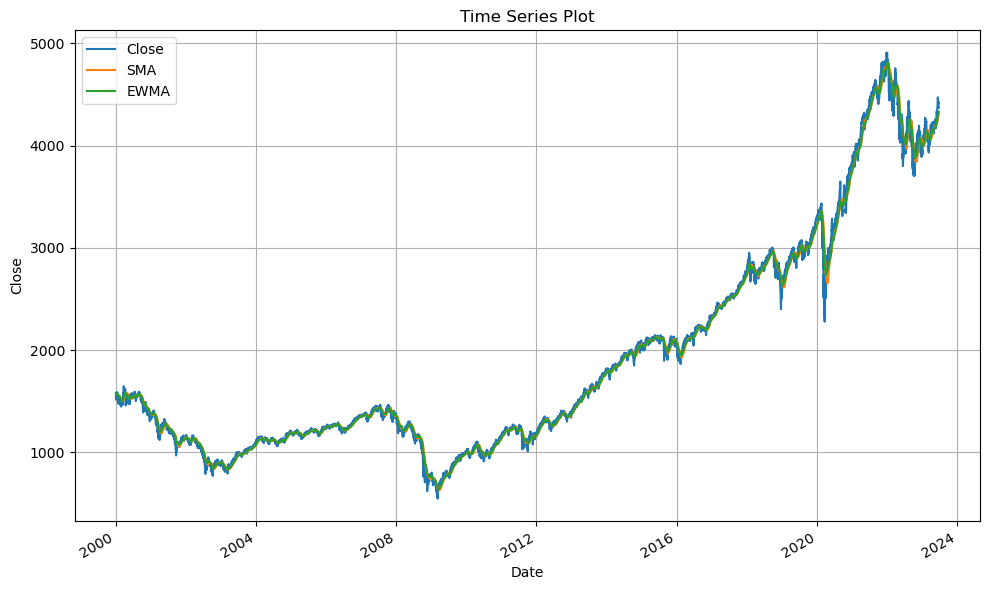

In [57]:
def plot_timeseries():

    df[[value_col,"SMA","EWMA"]].plot(figsize=(10,6))    
    plt.title('Time Series Plot')
    plt.xlabel(date_col)
    plt.ylabel(value_col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_timeseries()

In [58]:
df.describe()

,Source-ID,Open,High,Low,AdjustedClose,Close,Volume,SMA,EWMA,SRN,LRN,cum_SRN,cum_LRN
count,5913.0,5913.000000,5913.000000,5913.000000,5913.000000,5913.000000,5.913000e+03,5884.000000,5913.000000,5912.000000,5912.000000,5912.000000,5912.000000
mean,4.0,1918.373646,1932.626318,1903.188813,1918.941459,1918.081465,1.366154e+06,1912.974645,1911.333526,0.000257,0.000172,0.332944,0.063519
std,0.0,1005.385264,1012.473564,997.701934,1005.773794,1059.451019,8.531405e+05,1053.702841,1051.064529,0.013037,0.013039,0.623074,0.499698
min,4.0,671.250000,694.750000,665.750000,676.000000,549.500000,0.000000e+00,631.108333,635.951316,-0.113111,-0.120035,-0.794020,-1.054239
25%,4.0,1189.250000,1196.000000,1179.500000,1189.500000,1155.250000,7.206010e+05,1148.993750,1151.479719,-0.004874,-0.004886,-0.172038,-0.311176
50%,4.0,1450.750000,1459.500000,1438.750000,1451.500000,1408.750000,1.331841e+06,1398.912500,1405.386604,0.000614,0.000614,0.063980,-0.112861
75%,4.0,2451.750000,2467.250000,2433.000000,2452.750000,2524.500000,1.876415e+06,2536.025000,2528.899255,0.005961,0.005943,0.863042,0.470600
max,4.0,4785.250000,4808.250000,4770.500000,4786.000000,4908.250000,6.285917e+06,4809.958333,4809.587736,0.164594,0.152373,1.605816,1.135425


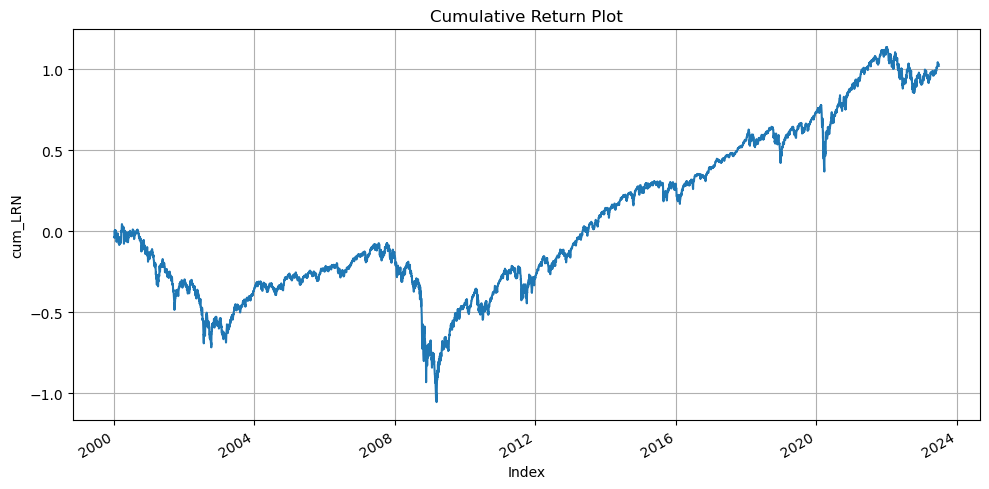

In [59]:
def plot_cummulative_returns():
    df['cum_LRN'].plot(figsize=(10, 5))
    plt.title('Cumulative Return Plot')
    plt.xlabel('Index')
    plt.ylabel("cum_LRN")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
plot_cummulative_returns()

In [60]:
# Function to plot based on date range
def plot_distribution(start_date, end_date):
    subset = df[start_date:end_date]
    clear_output(wait=True)
    sns.histplot(subset['LRN'], kde=True)
    plt.title(f'Distribution of LRN from {start_date} to {end_date}')
    plt.xlabel('LRN')
    plt.ylabel('Density')
    plt.show()

# Interactive widgets
start_widget = widgets.DatePicker(description='Start Date', value=df.index[0])
end_widget = widgets.DatePicker(description='End Date', value=df.index[-1])
widgets.interactive(plot_distribution, start_date=start_widget, end_date=end_widget)


interactive(children=(DatePicker(value=Timestamp('2000-01-03 00:00:00'), description='Start Date', step=1), Da…

/usr/local/anaconda3/envs/financial-analysis/lib/python3.10/site-packages/traitlets/traitlets.py:711: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

